Data Cleaning and Exploration

Import Libraries

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

LOAD DATA

In [384]:
import pandas as pd
# Load the dataset

# Load the XLSX file
df = pd.read_excel('/content/sample_data/literacy_rates_updated.xlsx')

# Save the file as CSV
#df.to_csv('/content/sample_data/literacy_rates_updated.csv', index=False)
#df

Shape and Columns Dictionary

In [385]:

# Display the first few rows of the dataset
#print(df.head())
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.321132
3,NaN,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


In [386]:
# Preview the last 10 rows
df.tail(10)

,Region,Country,Year,Age,Gender,Literacy rate
3303,Sub-Saharan Africa,Zimbabwe,2011,65+,female,0.398665
3304,Sub-Saharan Africa,Zimbabwe,2011,65+,male,0.825945
3305,Sub-Saharan Africa,Zimbabwe,2014,<15,female,0.882838
3306,Sub-Saharan Africa,Zimbabwe,2014,<15,male,0.891854
3307,Sub-Saharan Africa,Zimbabwe,2014,15-24,female,0.931883
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,male,0.875919
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.880485
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258
3312,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.927231


In [387]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3309 non-null   object 
 1   Country        3313 non-null   object 
 2   Year           3313 non-null   object 
 3   Age            3313 non-null   object 
 4   Gender         3313 non-null   object 
 5   Literacy rate  3308 non-null   float64
dtypes: float64(1), object(5)
memory usage: 155.4+ KB


**Ensure all columns match the data types listed in the data dictionary.**

change the data type of year to match data type in dictionary

In [389]:
#changing the data type of year to match that in dictionary
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3308 non-null   object 
 1   Country        3312 non-null   object 
 2   Year           3312 non-null   int64  
 3   Age            3312 non-null   object 
 4   Gender         3312 non-null   object 
 5   Literacy rate  3307 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 181.1+ KB


rename Literacy rate to Literacy Rate to match coluns in the dictionary

In [394]:
#changing Literacy rate to Literacy Rate
# Create a dictionary using old column name : new column name format
rename_dict = {"Literacy rate":"Literacy Rate"}
df = df.rename(rename_dict,axis=1)
# Check the datatype of Year
# Create a dictionary using old column name : new column name format
df['Year'].dtypes


dtype('int64')

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3308 non-null   object 
 1   Country        3312 non-null   object 
 2   Year           3312 non-null   int64  
 3   Age            3312 non-null   object 
 4   Gender         3312 non-null   object 
 5   Literacy Rate  3307 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 181.1+ KB


  all columns now match the data types listed in the data dictionary.

**DATA CLEANING**

Identify and address any duplicate values

In [396]:
duplicate_rows = df.duplicated()
duplicate_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
3308,False
3309,False
3310,False
3311,False


In [397]:
#df[df.duplicated()]
df[duplicate_rows]

,Region,Country,Year,Age,Gender,Literacy Rate
18,Central and Southern Asia,Bangladesh,2011,15-24,female,0.795445
39,Central and Southern Asia,Bangladesh,2013,65+,female,0.153041
167,Central and Southern Asia,Maldives,2014,25-64,male,0.989056
347,Eastern and South-Eastern Asia,China,2010,<15,female,0.927112
513,Eastern and South-Eastern Asia,Singapore,2013,<15,male,0.985425
763,Europe and Northern America,Portugal,2018,25-64,female,0.987342
1158,Latin America and the Caribbean,Colombia,2010,15-24,female,0.985172
1279,Latin America and the Caribbean,Dominican Republic,2016,15-24,female,0.988674
1558,Latin America and the Caribbean,Mexico,2013,<15,female,0.929039
2030,Northern Africa and Western Asia,Egypt,2013,65+,male,0.571875


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3308 non-null   object 
 1   Country        3312 non-null   object 
 2   Year           3312 non-null   int64  
 3   Age            3312 non-null   object 
 4   Gender         3312 non-null   object 
 5   Literacy Rate  3307 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 181.1+ KB


In [399]:
# Remove duplicates
df = df.drop_duplicates()

#check for duplicates again
df.duplicated().sum()
len(df)

3302

In [400]:
# Count the duplicates
#df.duplicated().sum()
df[duplicate_rows]

/tmp/ipython-input-400-1590927245.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicate_rows]


,Region,Country,Year,Age,Gender,Literacy Rate


In [401]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicate rows if any
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate rows dropped.")

Number of duplicate rows: 0


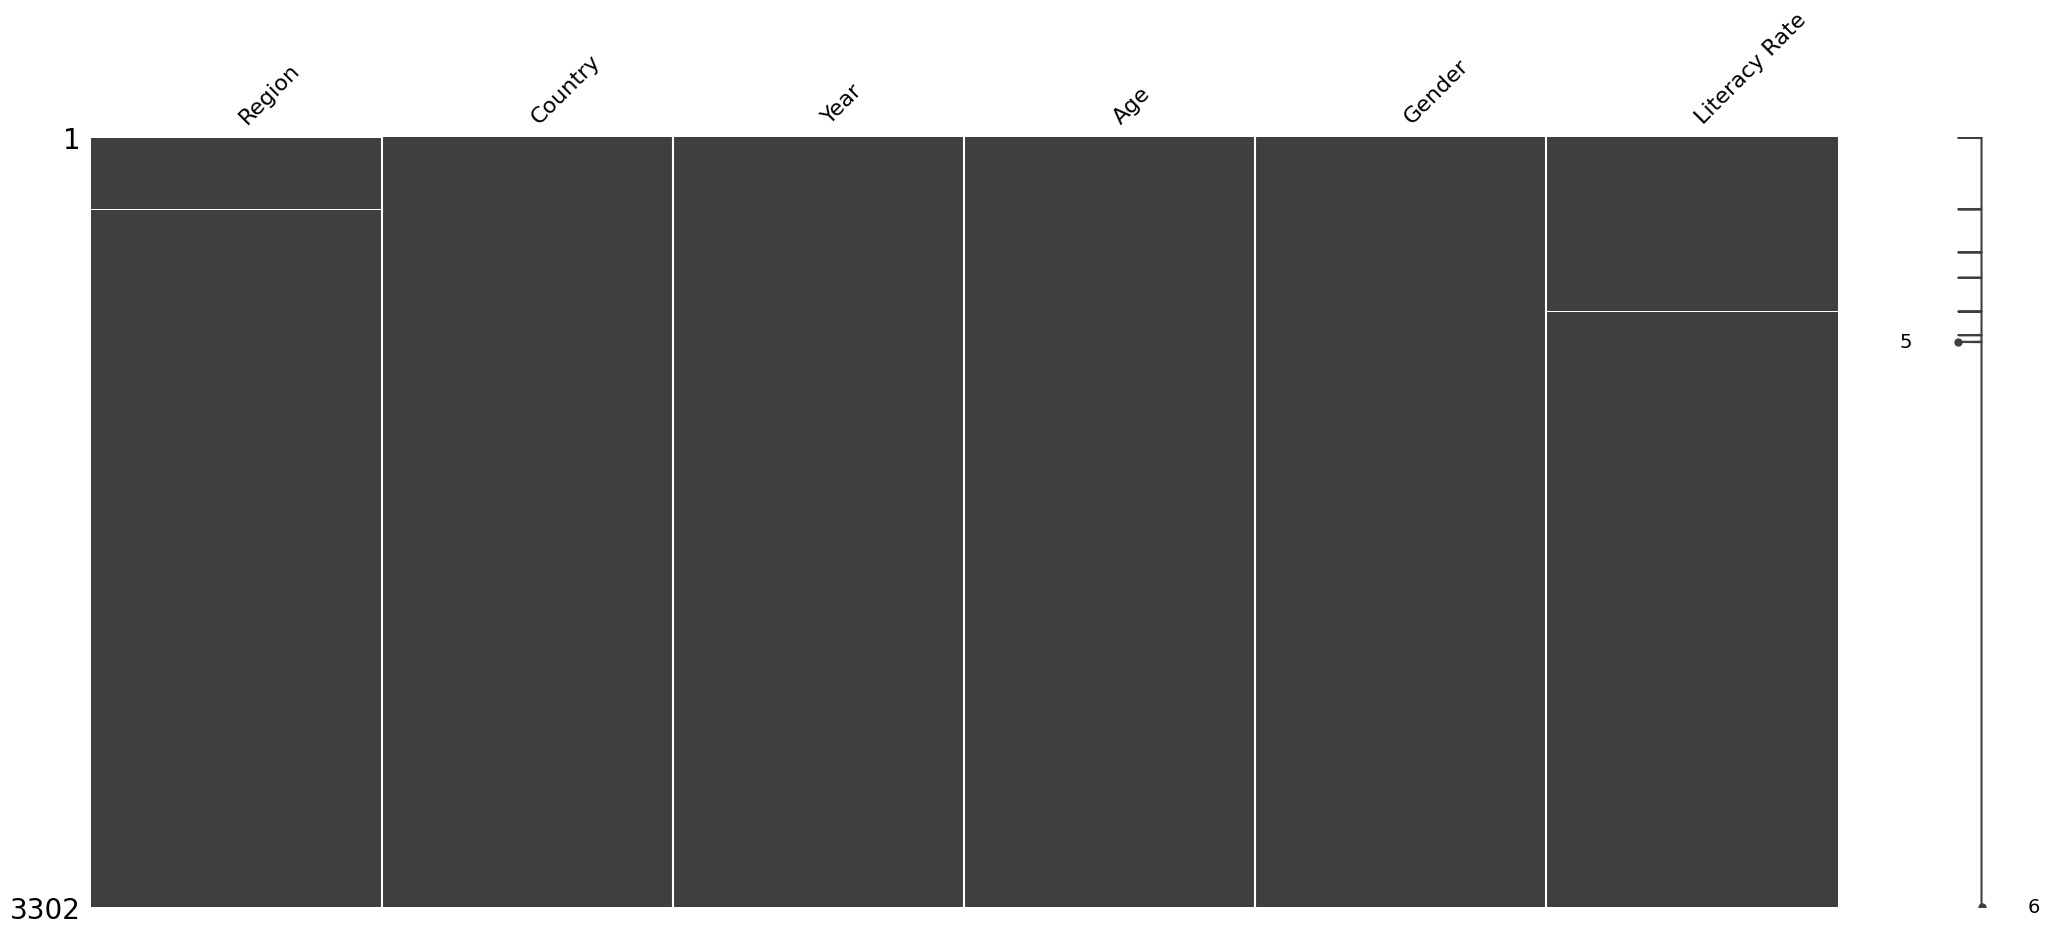

In [402]:
#Visual indicator for no duplicates
import missingno as msno
msno.matrix(df);

In [403]:
df.head()

,Region,Country,Year,Age,Gender,Literacy Rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.321132
3,NaN,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128


Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.


We can see see from the output above that some columns are complete and have no missing values. For example, "Country," "Year," and "Age" all indicate 0 null values. Region have 4 and literacy rate has 5
It is helpful to calculate the percent of null values for each column. Let's check the data type of the output to see how to proceed with a calculation:


**Identify and address any missing values in this dataset.**


Fill in missing values with a placeholder appropriate for the data type.

In [404]:
# Checking for missing values in our dataset
df.isna()

,Region,Country,Year,Age,Gender,Literacy Rate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3308,False,False,False,False,False,False
3309,False,False,False,False,False,False
3310,False,False,False,False,False,False
3311,False,False,False,False,False,False


In [405]:
# Confirming the sum of null values in every row
df.isna().sum()
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

,0
Region,4
Country,0
Year,0
Age,0
Gender,0
Literacy Rate,5


In [406]:
null_percent = null_sums/len(df) * 100
null_percent

,0
Region,0.121139
Country,0.000000
Year,0.000000
Age,0.000000
Gender,0.000000
Literacy Rate,0.151423


In [407]:
# Viewing only columns with null values
null_percent[null_percent>0]

,0
Region,0.121139
Literacy Rate,0.151423


In [408]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns #int and floats are included
num_cols

Index(['Year', 'Literacy Rate'], dtype='object')

In [409]:
# Saving list of column names for object cols
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Region', 'Country', 'Age', 'Gender'], dtype='object')

Addressing Nulls in categorical Columns

In [410]:
# Checking which categorical columns had missing values.
df[cat_cols].isna().sum()

,0
Region,4
Country,0
Age,0
Gender,0


In [411]:
#Fill in missing values with a placeholder appropriate for the data type.
# Using fillna to fill Alley's nulls with "MISSING"
df['Region']= df['Region'].fillna("MISSING")
#Returning the number of values
df['Region'].value_counts()

,count
Region,
Latin America and the Caribbean,940
Sub-Saharan Africa,769
Northern Africa and Western Asia,568
Europe and Northern America,336
Central and Southern Asia,307
Eastern and South-Eastern Asia,282
Oceania,96
MISSING,4


In [412]:
df[cat_cols].isna().sum()
#confirm that we no longer have missing values in the categorical columns.

,0
Region,0
Country,0
Age,0
Gender,0


Addressing Nulls in Numeric Columns

In [413]:
# Check numeric features for null values
df[num_cols].isna().sum()

,0
Year,0
Literacy Rate,5


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3302 non-null   object 
 1   Country        3302 non-null   object 
 2   Year           3302 non-null   int64  
 3   Age            3302 non-null   object 
 4   Gender         3302 non-null   object 
 5   Literacy Rate  3297 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


In [415]:
# Filling null values with -1
df['Literacy Rate']  = df['Literacy Rate'].fillna(-1)
df['Literacy Rate'].isna().sum()

np.int64(0)

In [416]:
df.isna().sum()

,0
Region,0
Country,0
Year,0
Age,0
Gender,0
Literacy Rate,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3302 non-null   object 
 1   Country        3302 non-null   object 
 2   Year           3302 non-null   int64  
 3   Age            3302 non-null   object 
 4   Gender         3302 non-null   object 
 5   Literacy Rate  3302 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


In [418]:
# Obtain summary statistics for the Literacy rate
df['Literacy Rate'].describe()

,Literacy Rate
count,3302.000000
mean,0.814519
std,0.245298
min,-1.000000
25%,0.725232
50%,0.929271
75%,0.985467
max,1.000000


In [419]:
# Obtain summary statistics for the Region
df['Region'].describe()

,Region
count,3302
unique,8
top,Latin America and the Caribbean
freq,940


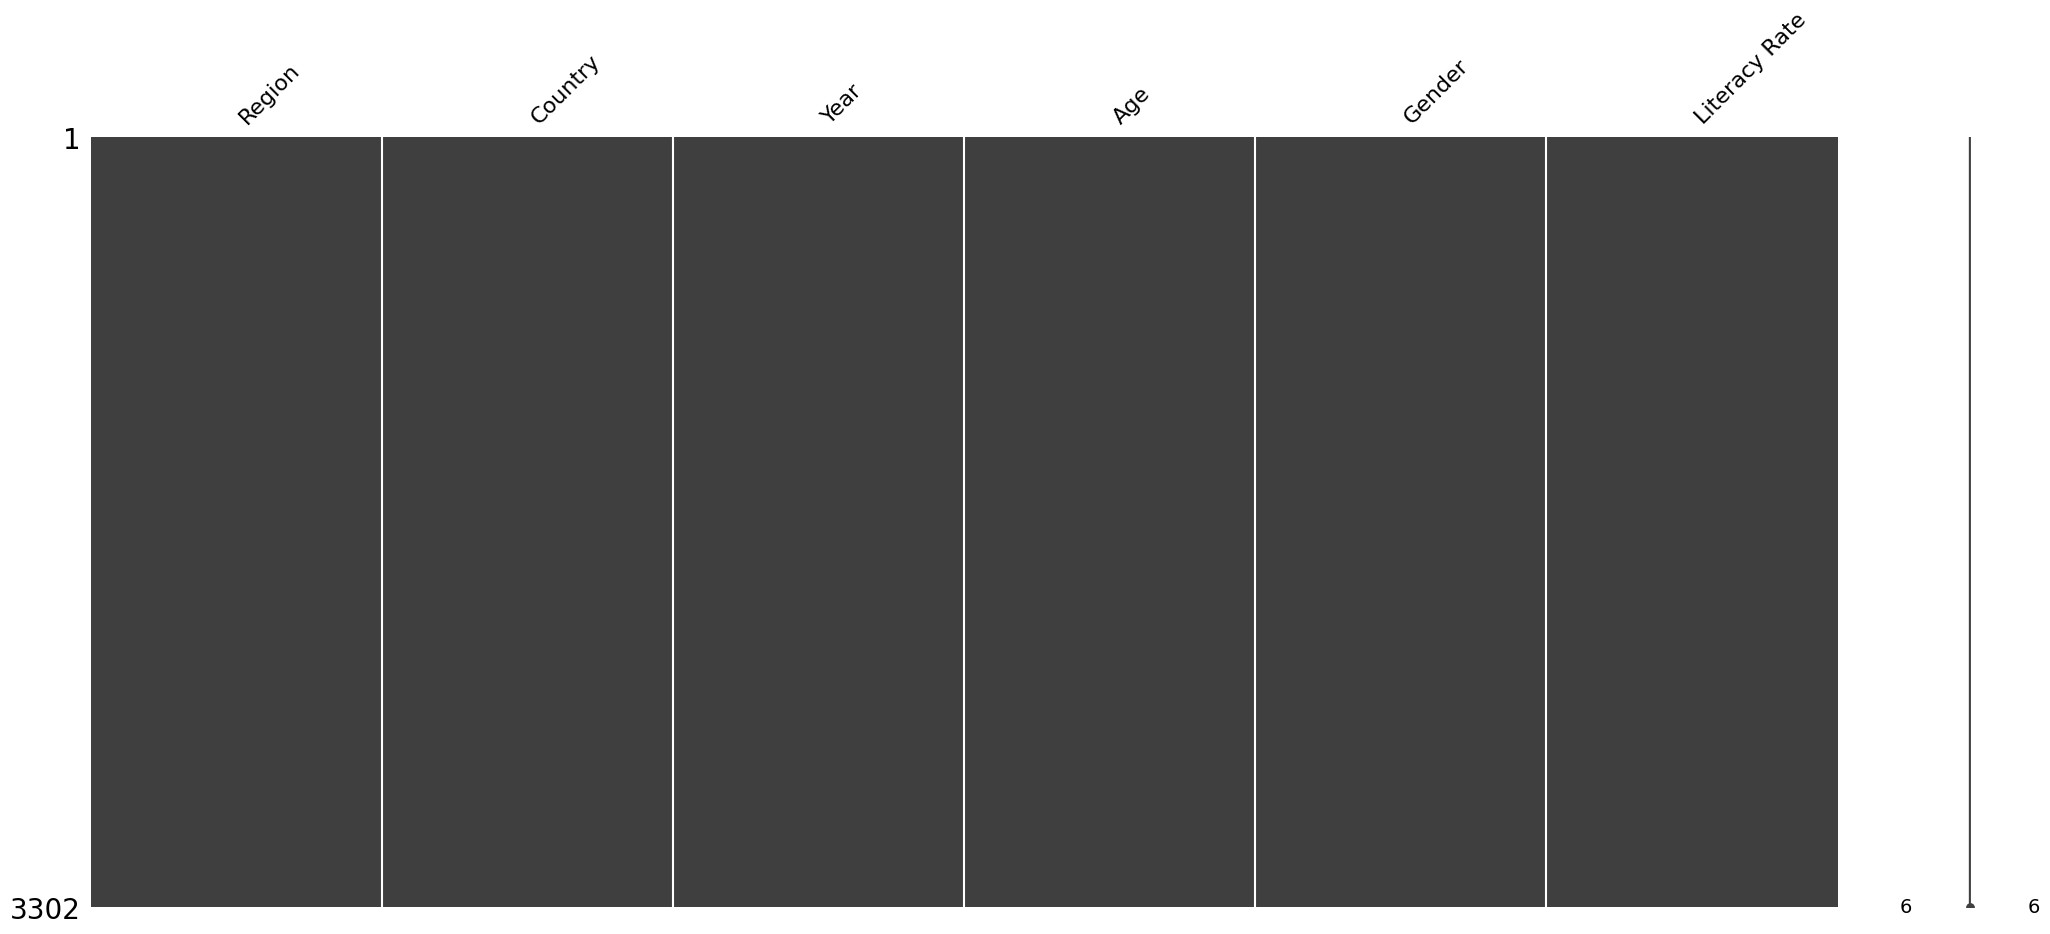

In [420]:
#Visual indicator for no duplicates/ missing values
import missingno as msno
msno.matrix(df);

Identify and address any inconsistencies in categorical values

Identify Inconsistencies

Check unique values: Use the unique() function to check the unique values in a categorical column. Look for typos: Check for typos, misspellings, or variations in spelling. Check for inconsistent formatting: Check for inconsistent formatting, such as different cases (e.g., "Yes" vs. "yes").

In [421]:
df[cat_cols]

,Region,Country,Age,Gender
0,Central and Southern Asia,Afghanistan,<15,female
1,Central and Southern Asia,Afghanistan,<15,male
2,MISSING,Afghanistan,15-24,female
3,MISSING,Afghanistan,15-24,male
4,Central and Southern Asia,Afghanistan,25-64,female
...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,15-24,male
3309,Sub-Saharan Africa,Zimbabwe,25-64,female
3310,Sub-Saharan Africa,Zimbabwe,25-64,male
3311,Sub-Saharan Africa,Zimbabwe,65+,female


It looks like another column already has -1 placeholder values: Lot Frontage. It is always a good idea to check the summary statistics and take note of any placeholder values.

In [422]:
# Check for inconsistencies in categorical values
categorical_columns = ['Region','Age','Gender','Country']  # Replace 'column_name' with actual categorical column names
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")



Unique values in Region: ['Central and Southern Asia' 'MISSING' 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']
Unique values in Age: ['<15' '15-24' '25-64' '65+']
Unique values in Gender: ['female' 'male' 'F' 'M']
Unique values in Country: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'S

In [423]:
# Address inconsistencies
df['Region'] = df['Region'].str.strip().str.lower()
df['Country'] = df['Country'].str.strip().str.lower()
df['Age'] = df['Age'].str.strip().str.lower()
df['Gender'] = df['Gender'].str.strip().str.lower()
  # Replace 'column_name' with actual column names
# Repeat this process for all categorical columns
df.head(3)

,Region,Country,Year,Age,Gender,Literacy Rate
0,central and southern asia,afghanistan,2011,<15,female,0.176121
1,central and southern asia,afghanistan,2011,<15,male,0.454171
2,missing,afghanistan,2011,15-24,female,0.321132


In [424]:
df.nunique()

,0
Region,8
Country,155
Year,10
Age,4
Gender,4
Literacy Rate,3236


In [425]:
#Calculate the percentage of the unique values
df.nunique() / len(df) * 100

,0
Region,0.242277
Country,4.694125
Year,0.302847
Age,0.121139
Gender,0.121139
Literacy Rate,98.001211


Identify Inconsistencies

Check unique values: Use the unique() function to check the unique values in a categorical column.
Look for typos: Check for typos, misspellings, or variations in spelling.
Check for inconsistent formatting: Check for inconsistent formatting, such as different cases (e.g., "Yes" vs. "yes").

In [426]:
# Check for inconsistencies in categorical values
categorical_columns = ['Region','Age','Gender','Country']  # Replace 'column_name' with actual categorical column names
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")



Unique values in Region: ['central and southern asia' 'missing' 'eastern and south-eastern asia'
 'europe and northern america' 'latin america and the caribbean'
 'northern africa and western asia' 'oceania' 'sub-saharan africa']
Unique values in Age: ['<15' '15-24' '25-64' '65+']
Unique values in Gender: ['female' 'male' 'f' 'm']
Unique values in Country: ['afghanistan' 'bangladesh' 'bhutan' 'india' 'iran (islamic republic of)'
 'kazakhstan' 'kyrgyzstan' 'maldives' 'nepal' 'pakistan' 'sri lanka'
 'tajikistan' 'turkmenistan' 'uzbekistan' 'brunei darussalam' 'cambodia'
 'china' 'china, macao special administrative region' 'indonesia'
 "lao people's democratic republic" 'malaysia' 'mongolia' 'myanmar'
 'philippines' 'singapore' 'thailand' 'timor-leste' 'viet nam' 'albania'
 'belarus' 'bosnia and herzegovina' 'bulgaria' 'croatia' 'estonia'
 'greece' 'hungary' 'italy' 'latvia' 'lithuania' 'malta' 'montenegro'
 'portugal' 'republic of moldova' 'romania' 'russian federation'
 'san marino' 's

In [427]:
# Address inconsistencies
df['Region'] = df['Region'].str.strip().str.lower()
df['Country'] = df['Country'].str.strip().str.lower()
df['Age'] = df['Age'].str.strip().str.lower()
df['Gender'] = df['Gender'].str.strip().str.lower()
  # Replace 'column_name' with actual column names
# Repeat this process for all categorical columns
df.head(3)

,Region,Country,Year,Age,Gender,Literacy Rate
0,central and southern asia,afghanistan,2011,<15,female,0.176121
1,central and southern asia,afghanistan,2011,<15,male,0.454171
2,missing,afghanistan,2011,15-24,female,0.321132


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3302 non-null   object 
 1   Country        3302 non-null   object 
 2   Year           3302 non-null   int64  
 3   Age            3302 non-null   object 
 4   Gender         3302 non-null   object 
 5   Literacy Rate  3302 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


In [429]:
df.nunique()

,0
Region,8
Country,155
Year,10
Age,4
Gender,4
Literacy Rate,3236


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3302 non-null   object 
 1   Country        3302 non-null   object 
 2   Year           3302 non-null   int64  
 3   Age            3302 non-null   object 
 4   Gender         3302 non-null   object 
 5   Literacy Rate  3302 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


In [ ]:
df.head()

,Region,Country,Year,Age,Gender,Literacy Rate
0,central and southern asia,afghanistan,2011,<15,female,0.176121
1,central and southern asia,afghanistan,2011,<15,male,0.454171
2,missing,afghanistan,2011,15-24,female,0.321132
3,missing,afghanistan,2011,15-24,male,0.618791
4,central and southern asia,afghanistan,2011,25-64,female,0.084128


Identify and Address Inconsistencies in NUMERICAL Values

Identify and Address Inappropriate or Unusual Data Points

In [430]:
# Check for outliers in numerical columns
numerical_columns = ['Year']  # Replace 'column_name' with actual numerical column names
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Outliers in {column}: {df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]}")

# Address outliers
# This may involve removing or transforming the data

Outliers in Year:                   Region   Country  Year    Age Gender  Literacy Rate
3308  sub-saharan africa  zimbabwe  3014  15-24   male       0.875919


In [432]:
# Check for outliers in numerical columns
numerical_columns = ['Literacy Rate']  # Replace 'column_name' with actual numerical column names
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Outliers in {column}: {df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]}")

# Address outliers
# This may involve removing or transforming the data

Outliers in Literacy Rate:                          Region                      Country  Year    Age  \
0     central and southern asia                  afghanistan  2011    <15   
2                       missing                  afghanistan  2011  15-24   
4     central and southern asia                  afghanistan  2011  25-64   
6     central and southern asia                  afghanistan  2011    65+   
7     central and southern asia                  afghanistan  2018    <15   
...                         ...                          ...   ...    ...   
3247         sub-saharan africa                       uganda  2012    65+   
3255         sub-saharan africa                       uganda  2018    65+   
3263         sub-saharan africa  united republic of tanzania  2010    65+   
3271         sub-saharan africa  united republic of tanzania  2012    65+   
3279         sub-saharan africa  united republic of tanzania  2015    65+   

      Gender  Literacy Rate  
0     female      

In [433]:
num_cols

Index(['Year', 'Literacy Rate'], dtype='object')

In [434]:
#Selected Numerical variables for Visualisation
Features = ['Year', 'Literacy rate'] #Two variables chosen to viauslise

In [ ]:
df['Year']

,Year
0,2011
1,2011
2,2011
3,2011
4,2011
...,...
3308,3014
3309,2014
3310,2014
3311,2014


**Data Exploration**

Univariate Exploratory Visualizations


1. Histogram

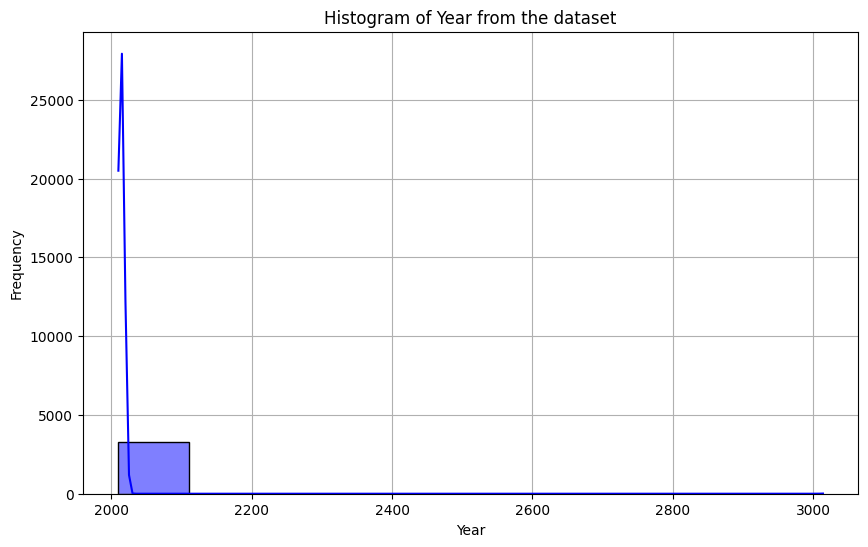

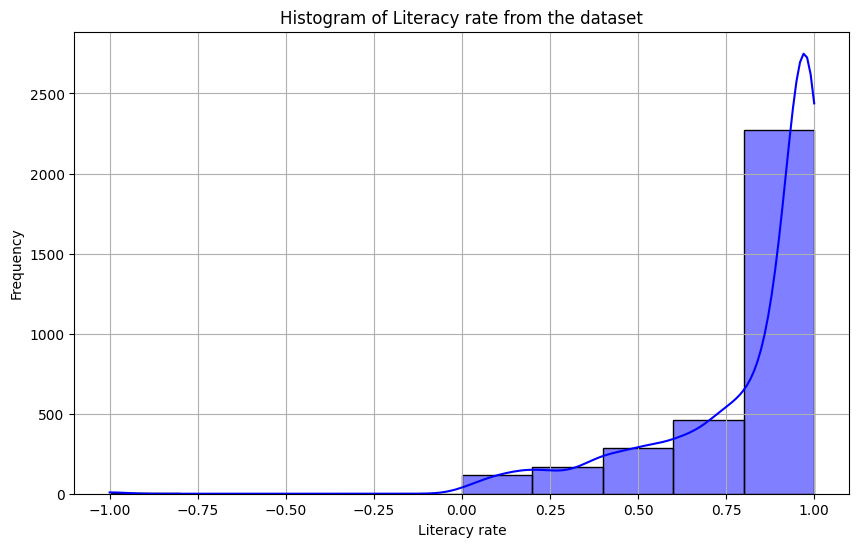

In [ ]:
# Histogram


for feature in Features:
    plt.figure(figsize=(10, 6)) #created a new plot with width 8, height 4
    plt.title(f'Histogram of {feature} from the dataset')# Set plot title with feature name
    plt.xlabel(feature)
    plt.ylabel('Frequency')                    # Label y-axis as "Frequency"
    sns.histplot(df[feature], bins=10, color='blue', edgecolor='black', kde=True) # Create histogram for data from the dataframewith 20 bars, blue fill, black borders
    plt.grid(True) #Turn on the gridlines
    plt.show() # Display the completed plot


the first histogram shows that there is high literacy rates in the 2000 going forward and the shape fall before the 2000 shows that literacy rate was very low before 2000

the secont histogram shows that the literacy rate will highly increase after 2000

Year 55.38055506443793
Literacy Rate -1.9382228049068022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3302 non-null   object 
 1   Country        3302 non-null   object 
 2   Year           3302 non-null   int64  
 3   Age            3302 non-null   object 
 4   Gender         3302 non-null   object 
 5   Literacy Rate  3302 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


BOX PLOT

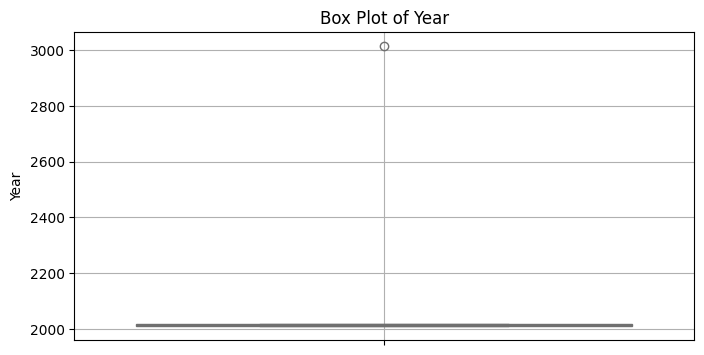

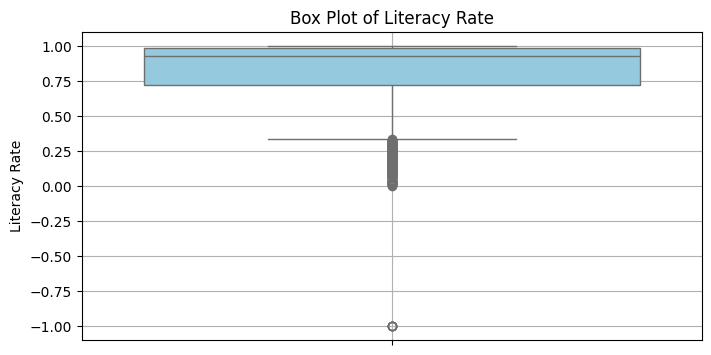

In [ ]:
for feature in Features:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {feature}')
    sns.boxplot(y=df[feature], color= 'Skyblue')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

a box plot is a type of visualization that can be created using Python libraries.

A box plot gives us a quick summary of our data's spread.

the first box shows that literacy rate is still in 2000s
The 'Year' plot shows that the literacy_rate will increase in 3000.we observe this  the   outlier dot.

In the 'literacy Rate' plot, the box is at the upper part Third Quartile (Q3): The upper edge of the box represents the third quartile (75th percentile), which is the median of the upper half of the dataset. this shows that there is a higher literacy rates but there is an out liers at -1.00, this shows there is still some age goups which cannot read and write





Multivariate Exploratory Visualizations

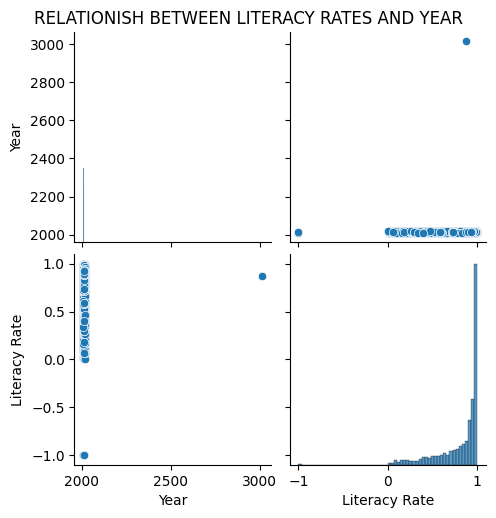

In [435]:
sns.pairplot(df)
plt.suptitle("RELATIONISH BETWEEN LITERACY RATES AND YEAR", y=1.02)
plt.show()

this scatter graph shows that there is no correlation between literacy and the different years

A** correlation matrix **is a table showing correlation coffecients between numerical variables and it is usually computed during the exploratory data analysis phase.Explotatory data analysis is the initial step done in data analysis or data science before actual data analysis is done The correlation values should range from -1 to 1. 1 indicates a perfect positive correlation,o indicates no correlation,-1 indicates a perfect negative correlation.

In [436]:
# Heatmap
###1.Compute the correlation matrix for numerical features and visualize it using a heatmap.
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix



,Year,Literacy Rate
Year,1.000000,0.006183
Literacy Rate,0.006183,1.000000


A heatmap is a type of data visualization that uses color to represent values in a matrix or table. It helps you quickly see patterns, trends, or relationships between variables.

A heatmap turns numbers into colors — the higher or lower the value, the darker or brighter the color (depending on the color scheme).

The heatmap shows the correlation between the numerical columns, which can help identify relationships.


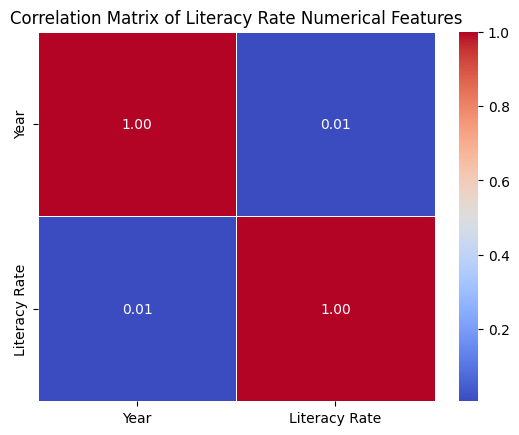

In [437]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' , fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Literacy Rate Numerical Features')
##Understanding the code parametres
print("The heatmap shows the correlation between the numerical columns, which can help identify relationships.")
##Understanding the code parametres
##annot=True: Shows the actual correlation numbers inside each cell.

##cmap='coolwarm': The color scheme. Red for positive, blue for negative correlations.There othercolor schemes that can bes used as such as 'coolwarm' 'RdBu''RdYlGn'and 'Spectral'

##fmt=".2f": Format of the numbers (2 decimal places).

##linewidths=0.5: Adds space between cells to make them clearer.

Looking at the heatmap there is no correlation between literacy rate and year


Use Kernel Density Estimation (KDE) plots to visualize feature distributions. KDE is a non-parametric way to estimate the probability density function (PDF) of a continuous variable meaning it shows how your data is distributed, without assuming a specific underlying distribution (like normal or uniform).

These visualizations provide insights into the distribution of individual variables and the relationships between variables, which can inform the non-profit organization's decision-making process.

In [ ]:
df

,Region,Country,Year,Age,Gender,Literacy Rate,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171,0.454171
2,MISSING,Afghanistan,2011,15-24,female,0.321132,0.321132
3,MISSING,Afghanistan,2011,15-24,male,0.618791,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128,0.084128
...,...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,male,0.875919,0.875919
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.880485,0.880485
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255,0.897255
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258,0.734258


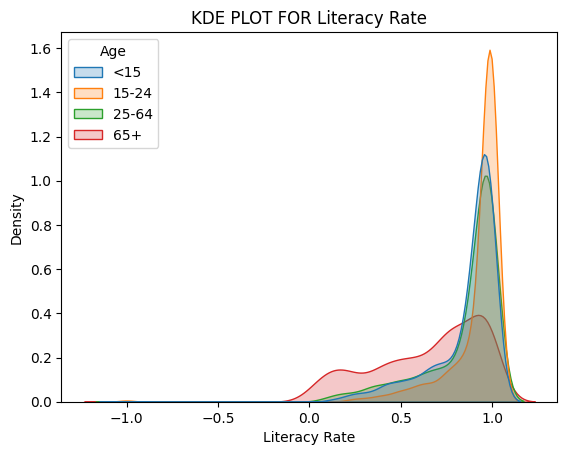

In [ ]:
sns.kdeplot(df,x='Literacy Rate',hue='Age',fill=True)
plt.title('KDE PLOT FOR Literacy Rate')
plt.show()

this kde shows that the age group 15-24 there is high literacy rates, people can read and write

the age range 65+ has many people who can read as well as many who cannot read so they have equal distribution of the literacy rates
the ages 15 and below, 25-64  has moderate people who can read and write

so the organisation should invest more in the education section to increase the literacy rate of all ages

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302 entries, 0 to 3312
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3302 non-null   object 
 1   Country        3302 non-null   object 
 2   Year           3302 non-null   int64  
 3   Age            3302 non-null   object 
 4   Gender         3302 non-null   object 
 5   Literacy Rate  3302 non-null   float64
 6   Literacy rate  3302 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 206.4+ KB
